In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math

plt.rcParams.update({'font.size': 10}) # Set global font size to 18

dataset_path = "./data/raw_can_data"

columns = ['id', 'timestamp', 'byte0', 'byte1', 'byte2', 'byte3', 'byte4', 'byte5', 'byte6', 'byte7']
giro_parado_giro = pd.read_csv(f'{dataset_path}/1508_031226_parado_giro_parado.txt', header=None, names=columns)
giro_parado_giro.head(10)

,id,timestamp,byte0,byte1,byte2,byte3,byte4,byte5,byte6,byte7
0,259,5812,120,255,35,32,80,255,0,0.0
1,260,5822,1,0,1,0,1,0,0,0.0
2,261,5832,49,2,0,0,0,0,0,0.0
3,0,5833,0,0,0,0,0,0,0,0.0
4,75,5837,0,0,0,0,0,0,0,0.0
5,76,5841,0,0,0,0,1,0,10,0.0
6,77,5846,24,49,0,0,0,0,5,0.0
7,78,5850,0,0,0,0,0,0,0,0.0
8,79,5854,0,0,0,0,0,0,0,0.0
9,81,5857,0,0,0,0,0,0,0,0.0


In [28]:
# filtra por id
stack1 = giro_parado_giro[giro_parado_giro['id'] == 300]
accumulator = giro_parado_giro[giro_parado_giro['id'] == 306]
giro_parado_giro.head(5)

,id,timestamp,byte0,byte1,byte2,byte3,byte4,byte5,byte6,byte7
0,259,5812,120,255,35,32,80,255,0,0.0
1,260,5822,1,0,1,0,1,0,0,0.0
2,261,5832,49,2,0,0,0,0,0,0.0
3,0,5833,0,0,0,0,0,0,0,0.0
4,75,5837,0,0,0,0,0,0,0,0.0


C:\Users\rapha\AppData\Local\Temp\ipykernel_25288\3744350175.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


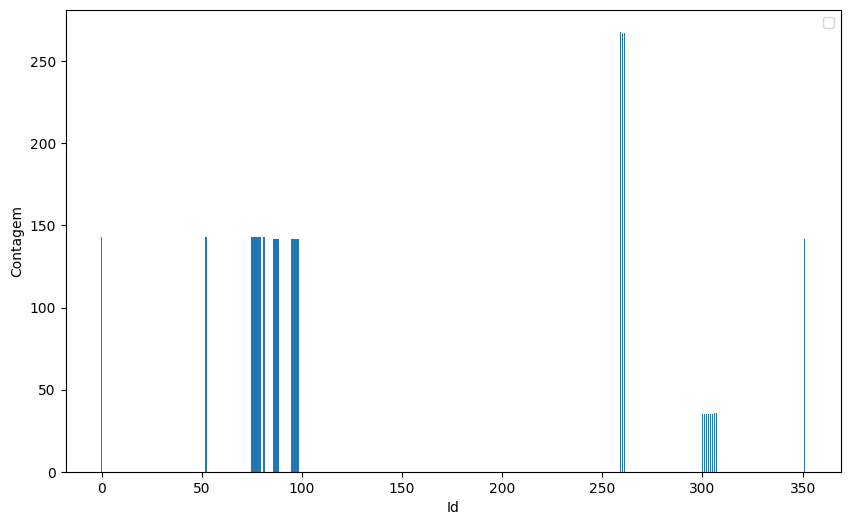

In [29]:
# numero de escritas por id
count_id = giro_parado_giro.groupby('id')['timestamp'].count().reset_index()
count_id

# plot
plt.figure(figsize=(10,6))
plt.bar(count_id['id'], count_id['timestamp'])

# Add labels and title
plt.xlabel('Id')
plt.ylabel('Contagem')

# Add a legend
plt.legend()

# Display the plot
plt.show()


C:\Users\rapha\AppData\Local\Temp\ipykernel_25288\3188231700.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


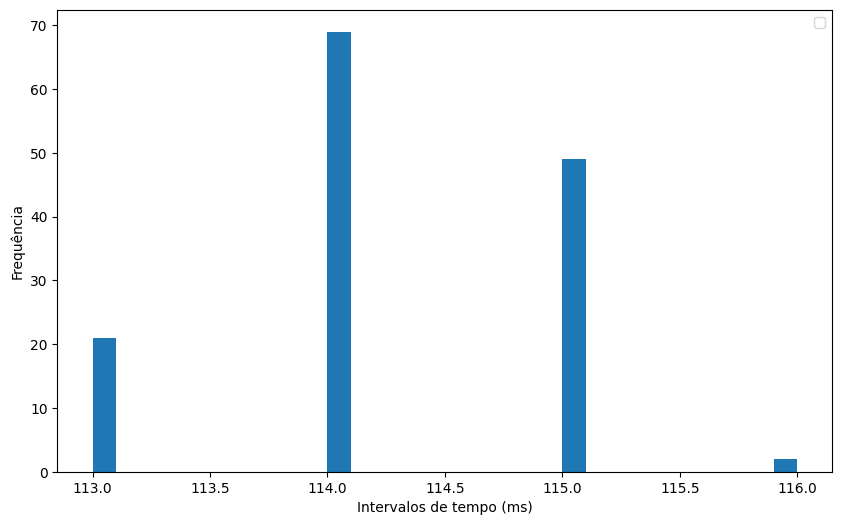

In [54]:
# analise de temporização - ECU
left_motor = giro_parado_giro[giro_parado_giro['id'] == 95]
                        
time_intervals = []

for i in range(1, left_motor['timestamp'].shape[0]):
    time_intervals.append(left_motor['timestamp'].iloc[i] - left_motor['timestamp'].iloc[i-1])

plt.figure(figsize=(10,6))
plt.hist(time_intervals, bins=30)

# Add labels and title

plt.xlabel('Intervalos de tempo (ms)')
plt.ylabel('Frequência')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
# analisa o conteudo dos pacotes agora
right_motor = giro_parado_giro[giro_parado_giro['id'] == 95]
right_motor.head(20)